In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
bmx = pd.read_sas('BMX_I.XPT')
demo = pd.read_sas('DEMO_I.XPT')
merged = bmx.merge(right = demo, on = 'SEQN')

# Question 1 - Baby Weights

In [3]:
#Calculate and display the mean weight of baby boys for each month, from month 0 to 12. You’ll produce 13 values, one for each month.
babies = merged.loc[merged['RIDAGEMN'].isnull() == False].copy()
babies12 = babies[babies["RIDAGEMN"].values.astype("int") <= 12]
babies000 = babies12[babies12["RIDAGEMN"].values.astype("int") >= 0]
babies000["RIDAGEMN"] = babies000["RIDAGEMN"].values.astype("int")
babies012boy = babies000[babies000["RIAGENDR"]==1]
meanboyweight = babies012boy.groupby("RIDAGEMN")["BMXWT"].mean()
print(meanboyweight)

RIDAGEMN
0      4.794444
1      5.791667
2      6.661111
3      7.000000
4      7.795000
5      8.525000
6      8.263636
7      9.061111
8      9.322222
9     10.093750
10    10.364286
11     9.963636
12    10.523077
Name: BMXWT, dtype: float64


In [4]:
#Calculate and display the mean weight of baby girls for each month, from month 0 to 12.
babies012girl = babies000[babies000["RIAGENDR"]==2]
meangirlweight = babies012girl.groupby("RIDAGEMN")["BMXWT"].mean()
print(meangirlweight)

RIDAGEMN
0     4.508333
1     5.457143
2     5.712500
3     6.553846
4     7.052941
5     7.647059
6     8.005263
7     8.190909
8     8.303704
9     9.243750
10    9.066667
11    9.100000
12    9.757143
Name: BMXWT, dtype: float64


In [5]:
#Calculate and display the difference between the mean weights of boys and girls for each month.
meandiff = meanboyweight - meangirlweight
print(meandiff)

RIDAGEMN
0     0.286111
1     0.334524
2     0.948611
3     0.446154
4     0.742059
5     0.877941
6     0.258373
7     0.870202
8     1.018519
9     0.850000
10    1.297619
11    0.863636
12    0.765934
Name: BMXWT, dtype: float64


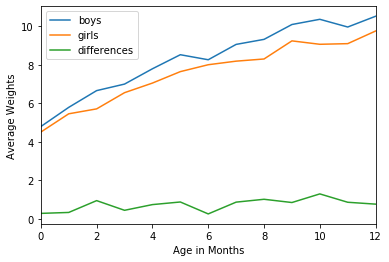

In [6]:
#Make a line plot showing two lines: one for boys’ mean weights months 0-12, and one for girls’ mean weights 0-12 (in a different color). The month will go on the x-axis, and the mean weight will go on the y-axis.
weights = pd.DataFrame({"boys":meanboyweight,"girls":meangirlweight,"differences":meandiff})
weights.plot()
plt.xlabel("Age in Months")
plt.ylabel("Average Weights")
plt.legend(loc="upper left")
plt.show()

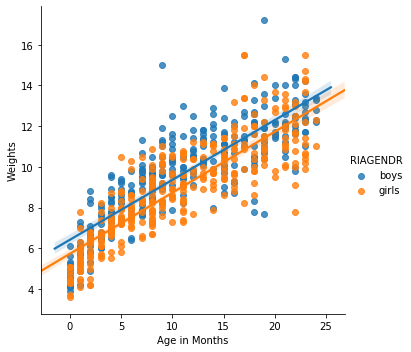

In [7]:
#(with seaborn) Make a scatterplot with linear regression lines for the baby boys’ relationship between age and wt, and the baby girls’ relationship between age and wt.
babies1 = babies.copy()
babies1["RIAGENDR"][babies1["RIAGENDR"]==1] = "boys"
babies1["RIAGENDR"][babies1["RIAGENDR"]==2] = "girls"
sns.lmplot(x="RIDAGEMN", y="BMXWT", hue="RIAGENDR", data=babies1)
plt.xlabel("Age in Months")
plt.ylabel("Weights")
plt.show()

In [8]:
#Comment on what you think the data says about the guiding question. Include any additional analysis you deem appropriate.

Yes, I think baby boys, on average, weigh more than baby girls. We can see that among all babies under 12 months old, the mean weight line for boys is always above the mean weight line for girls, and the weight difference line between boys and girls is positive everywhere. Also, for all babies under 24 months old, the fitted line for boys is also above the fitted line for girls across the entire Age axis.

# Question 2 - Height vs leg length vs arm length

In [9]:
#What is the correlation between standing height and upper leg length?
adults = merged.loc[:,["BMXLEG","RIDAGEYR","BMXARML","BMXHT"]].copy()
adults = adults.dropna()
adults20 = adults[adults["RIDAGEYR"].values.astype("int") >= 20]
print(adults20.BMXHT.corr(adults20.BMXLEG))

0.7874491670325252


In [10]:
#What is the correlation between standing height and upper arm length?
print(adults20.BMXHT.corr(adults20.BMXARML))

0.7978726822536472


In [11]:
#What is the correlation between upper leg length and upper arm length?
print(adults20.BMXLEG.corr(adults20.BMXARML))

0.629369419684494


In [12]:
#Make adult age groups by decade: i.e. adults aged 20-29.9, adults aged 30-39.9, … adults aged 70-79.9, adults aged 80+ (7 groups total). (not required, but recommended: use pandas.cut … this function was not explicitly covered in the notes, but you should be able to read the documentation to learn function usage. If you use this, set option: right=False)
#For each age group, calculate the mean of the three values.
adults["decade"] = pd.cut(adults["RIDAGEYR"], [20,30,40,50,60,70,80,90], right=False)
meanAdul = adults.groupby("decade")["BMXHT","BMXARML","BMXLEG"].mean()
print(meanAdul)

               BMXHT    BMXARML     BMXLEG
decade                                    
[20, 30)  167.879617  37.068919  40.064189
[30, 40)  167.488202  37.154754  39.556128
[40, 50)  166.563244  37.094632  38.680863
[50, 60)  166.351476  37.188784  38.163400
[60, 70)  164.977480  37.252859  37.342707
[70, 80)  164.728016  37.350102  36.984049
[80, 90)  162.097091  36.908000  36.516000


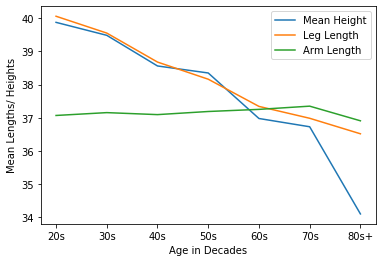

In [13]:
#We want to make a plot with three lines showing the relationship between the age decade and the mean height, leg length, and arm length.
meanAdul["ADJHT"] = meanAdul["BMXHT"] - 128
plt.plot(["20s","30s","40s","50s","60s","70s","80s+",],meanAdul["ADJHT"],label="Mean Height")
plt.plot(["20s","30s","40s","50s","60s","70s","80s+",],meanAdul["BMXLEG"],label="Leg Length")
plt.plot(["20s","30s","40s","50s","60s","70s","80s+",],meanAdul["BMXARML"],label="Arm Length")
plt.xlabel("Age in Decades")
plt.ylabel("Mean Lengths/ Heights")
plt.legend(loc="upper right")
plt.show()

In [14]:
#Comment on what you think the data says about the guiding question. Include any additional analysis you deem appropriate.

First, I want to mention that the correlations among the three variables are positive, meaning if we hold other outside independent factors constant, the three variables tend to move in the same direction. From the graph, we can see that upper leg length and height, on average, have the same trend. That is, as people age, their upper leg lengths and heights are shrinking together. However, the graph also shows that the mean upper arm length is likely to remain the same or even slightly increase as people are getting old. So, I would say heights and upper leg lengths are directly related, and this makes lots of sense, but upper arm length does not relate to age and either height or upper leg length. The high correlation between upper arm length and upper leg length and height is most likely due to the size of the person.

# Question 3 - Education Level and Income

In [15]:
#This is Q3. Cleaning data
adultsQ3 = merged.loc[:,["INDHHIN2","RIDAGEYR","DMDHREDU"]].copy()
adultsQ3 = adultsQ3.dropna()
adultsQ3 = adultsQ3[adultsQ3["RIDAGEYR"].values.astype("int") >= 20]
print(adultsQ3.INDHHIN2.unique())
print(adultsQ3.DMDHREDU.unique())
adultsQ3 = adultsQ3[adultsQ3['DMDHREDU'] != 9]
adultsQ3 = adultsQ3[adultsQ3['INDHHIN2'] != 77]
adultsQ3 = adultsQ3[adultsQ3['INDHHIN2'] != 99]
adultsQ3 = adultsQ3[adultsQ3['INDHHIN2'] != 12]
adultsQ3 = adultsQ3[adultsQ3['INDHHIN2'] != 13]
adultsQ3.INDHHIN2[adultsQ3['INDHHIN2'] == 1] = 2500
adultsQ3.INDHHIN2[adultsQ3['INDHHIN2'] == 2] = 7500
adultsQ3.INDHHIN2[adultsQ3['INDHHIN2'] == 3] = 12500
adultsQ3.INDHHIN2[adultsQ3['INDHHIN2'] == 4] = 17500
adultsQ3.INDHHIN2[adultsQ3['INDHHIN2'] == 5] = 22500
adultsQ3.INDHHIN2[adultsQ3['INDHHIN2'] == 6] = 30000
adultsQ3.INDHHIN2[adultsQ3['INDHHIN2'] == 7] = 40000
adultsQ3.INDHHIN2[adultsQ3['INDHHIN2'] == 8] = 50000
adultsQ3.INDHHIN2[adultsQ3['INDHHIN2'] == 9] = 60000
adultsQ3.INDHHIN2[adultsQ3['INDHHIN2'] == 10] = 70000
adultsQ3.INDHHIN2[adultsQ3['INDHHIN2'] == 14] = 87500
adultsQ3.INDHHIN2[adultsQ3['INDHHIN2'] == 15] = 150000

[10.  4.  5.  7. 14.  6.  3. 15.  1.  8.  2. 77. 12.  9. 99. 13.]
[5. 3. 4. 1. 2. 9.]


In [16]:
#Print the shape of the resulting data before the next step.
adultsQ3.shape

(4720, 3)

0.4028897364108464


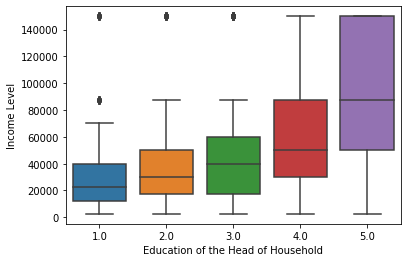

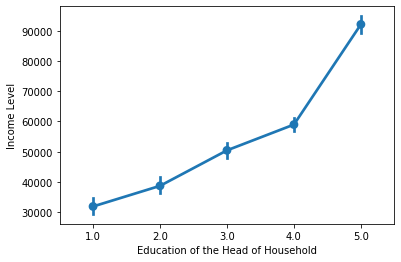

In [17]:
#Summarize and display the data to explore the relationship between education level and income. This question is purposely open-ended. You choose how best to summarize and display the data to answer the question regarding education level and household income.
print(adultsQ3.INDHHIN2.corr(adultsQ3.DMDHREDU))
sns.boxplot(adultsQ3.DMDHREDU, adultsQ3.INDHHIN2)
plt.xlabel("Education of the Head of Household")
plt.ylabel("Income Level")
plt.show()
sns.pointplot(adultsQ3.DMDHREDU, adultsQ3.INDHHIN2, estimator=np.mean)
plt.xlabel("Education of the Head of Household")
plt.ylabel("Income Level")
plt.show()

We can see the correlation between the education level of the head of household and the income level of the family is positive and about 0.403, which is practically significant. If we look at the graphs, an upward sloping trend can be viewed, indicating that, on average, the higher education level a head of household has, the higher income his or her family is expected to earn. The boxplot tells that the same relationship between education and income is also true in terms of the median values. In addition, this relationship seems quadratic rather than linear - The average income increases at an increasing rate as education increases.

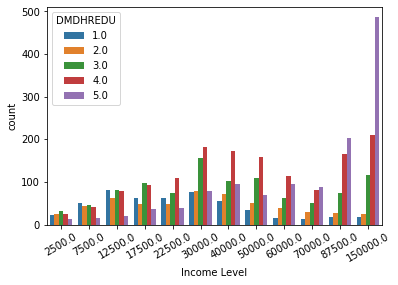

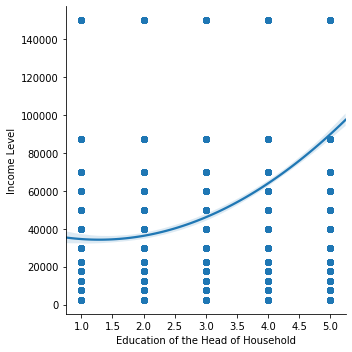

In [18]:
#Be sure to comment on what you think the data and displays say about the guiding question.
sns.countplot(x="INDHHIN2", hue="DMDHREDU", data=adultsQ3)
plt.xlabel("Income Level")
plt.xticks(rotation=30)
plt.show()
sns.lmplot(x="DMDHREDU", y="INDHHIN2", data=adultsQ3, order=2)
plt.xlabel("Education of the Head of Household")
plt.ylabel("Income Level")
plt.show()

The relationship between the educaiton level of the head of household and family income has been explained above, yet there are some additional information about this relationship found in this dataset. The first thing to mention is the quadratic curve shown in the linear model plot, which has its order parameter set on 2. We can see, as for education level, 4 (Associates) and 5 (Bachelors or graduate) might generate a higher return rate on income level than 1, 2, and 3 (primary and secondary educations) might. As the heads of household receive higher education, the return to education (rate) is increasing. Also, from the side-by-side bar chart, we can see among families who earn 75,000 USD to 99,999 USD per year (initially Category 14, which has been coded as 87,500 here), a mass majority of their heads of household have at least an Associate's degree. Among families who earn more than 100,000 USD per year (initially Category 15, now coded as 150,000), most of their heads of household have a Bachelor's degree or even higher. However, we are not a hundred percent sure whether the higher income is because of the higher education. We know that post-secondary education is very costly, especially to families which do not earn a great annual income. So, there are possibilities that people from low-income families cannot afford college hence head straight to work while people from rich families pay to go to college or graduate school.